# Recommending Films for Box Office Success!

![image](https://vip-go.premiumbeat.com/wp-content/uploads/2022/02/vr_2.jpg)

*Image by DOP Eben Bolter on the LED volume stage at Rebellion Film Studios in Oxford, UK.*

## Overview

Our company sees competitors creating original video content and now wants to join the market trend. We create a new film studio despite the lack of knowledge in everything related to movies.

As the data scientist of the company, my goal is to explore what types of films are currently performing the best at the box office and with my findings – create actionable insights that the company's new studio can use to decide what type of films to create.

## Challenge

With the task at hand, we will be presenting to our company stakeholders three different recommendations that will directly affect our business revenue. The goal is to provide data-driven direction for our new film studio using evidence that our recommendations will result in truly benefitting the company.

## Datasets

In the folder `zippedData`, we have datasets from:

- [Box Office Mojo](https://www.boxofficemojo.com/)
- [IMDB](https://www.imdb.com/)
- [The Numbers](https://www.the-numbers.com/)

## Solution

This project uses statistical analysis, including formulating three hypotheses of what contributes to a film's success. We infer three different business recommendations and use box-office data to prove our hypotheses and provide statistics as evidence to support our recommendations for the company and the direction for our new film studio.

## Results

# Loading Essentials

## Loading Tools

Import our datascience tools.

In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', '{:,.2f}'.format)

## Loading Datasets

### IMdb, SQL Database

IMdb aims to collect any and all data of all films to showcase everyday people.

In [2]:
zip_path = 'zippedData/im.db.zip'
extract_path = 'zippedData/'

with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(extract_path)

db_path = os.path.join(extract_path, 'im.db')

conn = sqlite3.connect(db_path)
pd.read_sql("""
    SELECT *
    FROM sqlite_master
    WHERE type = 'table';
""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [3]:
df_imdb = pd.read_sql("""
    SELECT *
    FROM movie_basics AS mb
    INNER JOIN movie_ratings AS mr ON mb.movie_id =mr.movie_id;
""",conn)
df_imdb['title'] = df_imdb['primary_title']
df_imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,title
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",tt0063540,7.00,77,Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",tt0066787,7.20,43,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,tt0069049,6.90,4517,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.10,13,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",tt0100275,6.50,119,The Wandering Soap Opera
...,...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00,Documentary,tt9913084,6.20,6,Diabolik sono io
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00,"Drama,Family",tt9914286,8.70,136,Sokagin Çocuklari
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.50,8,Albatross
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.60,5,La vida sense la Sara Amat


### TheNumbers, CSV

TheNumbers goal is to collect the most accurate details of any film's budgets and revenues.

In [4]:
df_tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_tn_movie_budgets['title'] = df_tn_movie_budgets['movie']
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Red 11
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Following
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Return to the Land of Wonders
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,A Plague So Pleasant


### Merge Data For Analysis

Reasons for Combined Data
- It was neccessary we `merge` our data from `IMdb` and `TheNumbers` because IMdb is a popular platform that houses all details of films, including genres, ratings, and votes and TheNumbers has reliable information regarding film budgets and revenues across the world.
- By combining these two datasets, we couple our data of `films`, `genres`, `ratings`, and `votes` with `financial data` to help us investigate deeper in our analysis.

In [5]:
df_box_office = pd.merge(df_imdb, df_tn_movie_budgets, on='title', how='inner')
df_box_office

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",tt0249516,1.90,8248,Foodfight!,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.00,None,tt0326592,7.50,24,The Overnight,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",tt0337692,6.10,37886,On the Road,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",tt0359950,7.30,275300,The Secret Life of Walter Mitty,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",tt0365907,6.50,105116,A Walk Among the Tombstones,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt9746500,Earth,Erde,2019,115.00,Documentary,tt9746500,7.30,49,Earth,36,"Apr 22, 2009",Earth,"$47,000,000","$32,011,576","$116,773,317"
2871,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama",tt9851050,4.70,14,Sisters,57,"Dec 18, 2015",Sisters,"$30,000,000","$87,044,645","$106,030,660"
2872,tt9861522,Ali,Ali,2019,110.00,Drama,tt9861522,7.70,79,Ali,45,"Dec 25, 2001",Ali,"$109,000,000","$58,183,966","$87,683,966"
2873,tt9899880,Columbus,Columbus,2018,85.00,Comedy,tt9899880,5.80,5,Columbus,93,"Aug 4, 2017",Columbus,"$700,000","$1,017,107","$1,110,511"


# Exploratory Data Analysis

## 1. Understanding The Data
- Dataframe `shape`
- `head` and `tail`
- `info`
- `describe`

In [6]:
df_box_office.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",tt0249516,1.90,8248,Foodfight!,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.00,None,tt0326592,7.50,24,The Overnight,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",tt0337692,6.10,37886,On the Road,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",tt0359950,7.30,275300,The Secret Life of Walter Mitty,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",tt0365907,6.50,105116,A Walk Among the Tombstones,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"


In [7]:
df_box_office.shape

(2875, 16)

In [8]:
df_box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   movie_id           2875 non-null   object 
 7   averagerating      2875 non-null   float64
 8   numvotes           2875 non-null   int64  
 9   title              2875 non-null   object 
 10  id                 2875 non-null   int64  
 11  release_date       2875 non-null   object 
 12  movie              2875 non-null   object 
 13  production_budget  2875 non-null   object 
 14  domestic_gross     2875 non-null   object 
 15  worldwide_gross    2875 non-null   object 
dtypes: float64(2), int64(3),

In [9]:
df_box_office.describe()

,start_year,runtime_minutes,averagerating,numvotes,id
count,"2,875.00","2,757.00","2,875.00","2,875.00","2,875.00"
mean,"2,013.92",102.95,6.25,"66,280.38",50.94
std,2.55,20.79,1.19,"134,307.71",28.70
min,"2,010.00",3.00,1.60,5.00,1.00
25%,"2,012.00",90.00,5.60,141.00,27.00
50%,"2,014.00",101.00,6.40,"7,951.00",51.00
75%,"2,016.00",113.00,7.10,"75,081.00",76.00
max,"2,019.00",280.00,9.30,"1,841,066.00",100.00


## Step 2. Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming columns
- Feature creation

Let's clean up our dataset by `dropping` irrelevant `columns` and `renaming` them to represent the data better.

In [10]:
df = df_box_office[[
    # 'movie_id', 'original_title', 'start_year', 
    # 'runtime_minutes', 'movie_id', 'title', 'id', 'movie'
    'primary_title',  'genres', 'averagerating', 'numvotes', 
    'release_date', 'production_budget', 'worldwide_gross' ]]

df.rename(columns={ 'primary_title':'film', 'averagerating':'rating', 'numvotes':'votes', 
                    'release_date':'release', 'production_budget':'budget',
                    'worldwide_gross':'revenue' }, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   film     2875 non-null   object 
 1   genres   2867 non-null   object 
 2   rating   2875 non-null   float64
 3   votes    2875 non-null   int64  
 4   release  2875 non-null   object 
 5   budget   2875 non-null   object 
 6   revenue  2875 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 157.4+ KB


There are some important data preparation we need to do:
- Replace `genre` values that are `NaN` with string `'unknown'` if data is missing. This way we are not losing any data even if we don't know the genre.
- Convert `release` to pandas `datetime` so that we can do some logical operations over it for deeper investigation.
- Convert `budget` and `revenue` into `int` so that we can do logical operations over the data for better analysis.
- Create new feature `profit` so that we better understand film financials.
- Normalize `rating` because the feature is directly affected by `votes` which disproportianately affects the true rating.

In [11]:
df['genres'].fillna('unknown', inplace=True)
df.genres

0       Action,Animation,Comedy
1                       unknown
2       Adventure,Drama,Romance
3        Adventure,Comedy,Drama
4            Action,Crime,Drama
                 ...           
2870                Documentary
2871               Action,Drama
2872                      Drama
2873                     Comedy
2874                Documentary
Name: genres, Length: 2875, dtype: object

In [12]:
mask = pd.to_datetime(df['release'], format='%b %d, %Y')
df['release'] = mask
df.release

0      2012-12-31
1      2015-06-19
2      2013-03-22
3      2013-12-25
4      2014-09-19
          ...    
2870   2009-04-22
2871   2015-12-18
2872   2001-12-25
2873   2017-08-04
2874   2010-11-12
Name: release, Length: 2875, dtype: datetime64[ns]

In [13]:
mask = df['budget'].str.strip('$').str.replace(',','').astype(float)
df['budget'] = mask
mask = df['revenue'].str.strip('$').str.replace(',','').astype(float)
df['revenue'] = mask
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   film     2875 non-null   object        
 1   genres   2875 non-null   object        
 2   rating   2875 non-null   float64       
 3   votes    2875 non-null   int64         
 4   release  2875 non-null   datetime64[ns]
 5   budget   2875 non-null   float64       
 6   revenue  2875 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 157.4+ KB


In [14]:
df.head()

,film,genres,rating,votes,release,budget,revenue
0,Foodfight!,"Action,Animation,Comedy",1.90,8248,2012-12-31,"45,000,000.00","73,706.00"
1,The Overnight,unknown,7.50,24,2015-06-19,"200,000.00","1,165,996.00"
2,On the Road,"Adventure,Drama,Romance",6.10,37886,2013-03-22,"25,000,000.00","9,313,302.00"
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.30,275300,2013-12-25,"91,000,000.00","187,861,183.00"
4,A Walk Among the Tombstones,"Action,Crime,Drama",6.50,105116,2014-09-19,"28,000,000.00","62,108,587.00"


We will be creating a `new feature` to represent the `profit` the film made by taking the `difference` between each film's `budget` and `revenue`. This reasons for this new feature is:
- The feature `profit` will immediately show us whether a movie resulted in a loss or profit.
- We can compare actual `revenue` earned between films for better analysis.
- The `profit` will tell us if `budget` plays a role in `revenue` and the film's success.
- We also want to only work with the `top 60%` of profit belonging to the data.
- We lastly `filter` the dataframe with films of only the `top 60%` of `profit` because our goal is to analyze the data that leads to great profits, which will be found in the higher grossing films.

In [15]:
df['profit'] = df['revenue'] - df['budget']
df.tail()

,film,genres,rating,votes,release,budget,revenue,profit
2870,Earth,Documentary,7.30,49,2009-04-22,"47,000,000.00","116,773,317.00","69,773,317.00"
2871,Sisters,"Action,Drama",4.70,14,2015-12-18,"30,000,000.00","106,030,660.00","76,030,660.00"
2872,Ali,Drama,7.70,79,2001-12-25,"109,000,000.00","87,683,966.00","-21,316,034.00"
2873,Columbus,Comedy,5.80,5,2017-08-04,"700,000.00","1,110,511.00","410,511.00"
2874,Unstoppable,Documentary,8.10,8,2010-11-12,"95,000,000.00","165,720,921.00","70,720,921.00"


Finding the `top 60%` of the `profit` feature.

In [16]:
top_60_percent = df['profit'].quantile(0.6)
mask = df[df['profit'] >= top_60_percent]
mask.shape

(1150, 8)

Essential `reset` of the dataframe to only be the films that reflect the `top 60%` of `profits` from the original data.

In [17]:
df = mask.sort_values(by='profit', ascending=False).reset_index(drop=True).copy()
df.head()

,film,genres,rating,votes,release,budget,revenue,profit
0,Avatar,Horror,6.10,43,2009-12-18,"425,000,000.00","2,776,345,279.00","2,351,345,279.00"
1,Titanic,Adventure,6.20,20,1997-12-19,"200,000,000.00","2,208,208,395.00","2,008,208,395.00"
2,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.50,670926,2018-04-27,"300,000,000.00","2,048,134,200.00","1,748,134,200.00"
3,Jurassic World,"Action,Adventure,Sci-Fi",7.00,539338,2015-06-12,"215,000,000.00","1,648,854,864.00","1,433,854,864.00"
4,Furious 7,"Action,Crime,Thriller",7.20,335074,2015-04-03,"190,000,000.00","1,518,722,794.00","1,328,722,794.00"


We have two columns `rating` and `votes` that directly are affected by each other. This makes our analysis a little difficult because films with significantly less votes will affect comparing ratings with films that got a much larger number of votes.

For that reason, we created a new feature `weighted_rating` which accurately represents the film rating based on the amounts of votes the film received. This feature has been normalized throughout the data.

In [18]:
C = df['rating'].mean()
m = df['votes'].quantile(0.6) # Only considering votes that are greater than the bottom 60%.
def weighted_rating(x, m=m, C=C):
    v = x['votes']
    R = x['rating']
    return (v / (v + m) * R) + (m / (v + m) * C)

df['weighted_rating'] = df.apply(weighted_rating, axis=1)
df[['film', 'rating', 'votes', 'weighted_rating']]

,film,rating,votes,weighted_rating
0,Avatar,6.10,43,6.46
1,Titanic,6.20,20,6.46
2,Avengers: Infinity War,8.50,670926,8.23
3,Jurassic World,7.00,539338,6.91
4,Furious 7,7.20,335074,7.02
...,...,...,...,...
1145,The One,5.40,143,6.46
1146,The One,5.00,681,6.45
1147,Max,5.10,248,6.45
1148,Max,6.80,23976,6.52


We apply the changes onto our original dataframe `rating` so that we don't add irrelevant features; including dropping `votes` since our rating scale has been weighted with votes. 

In [19]:
df['rating'] = df['weighted_rating']
df = df[['film', 'genres', 'rating', 'release', 'budget', 'revenue', 'profit', # 'votes', 'weighted_rating'
   ]]
df

,film,genres,rating,release,budget,revenue,profit
0,Avatar,Horror,6.46,2009-12-18,"425,000,000.00","2,776,345,279.00","2,351,345,279.00"
1,Titanic,Adventure,6.46,1997-12-19,"200,000,000.00","2,208,208,395.00","2,008,208,395.00"
2,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.23,2018-04-27,"300,000,000.00","2,048,134,200.00","1,748,134,200.00"
3,Jurassic World,"Action,Adventure,Sci-Fi",6.91,2015-06-12,"215,000,000.00","1,648,854,864.00","1,433,854,864.00"
4,Furious 7,"Action,Crime,Thriller",7.02,2015-04-03,"190,000,000.00","1,518,722,794.00","1,328,722,794.00"
...,...,...,...,...,...,...,...
1145,The One,Comedy,6.46,2001-11-02,"49,000,000.00","72,689,126.00","23,689,126.00"
1146,The One,"Comedy,Drama,Romance",6.45,2001-11-02,"49,000,000.00","72,689,126.00","23,689,126.00"
1147,Max,Comedy,6.45,2015-06-26,"20,000,000.00","43,658,157.00","23,658,157.00"
1148,Max,"Adventure,Drama,Family",6.52,2015-06-26,"20,000,000.00","43,658,157.00","23,658,157.00"


## Step 3. Feature Understanding
- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

In [20]:
df.sample(n=10)

,film,genres,rating,release,budget,revenue,profit
178,Thor,"Action,Adventure,Fantasy",6.93,2011-05-06,"150,000,000.00","449,326,618.00","299,326,618.00"
281,Rush Hour,Documentary,6.46,1998-09-18,"35,000,000.00","245,300,000.00","210,300,000.00"
214,Ghostbusters,"Action,Comedy,Fantasy",5.65,1984-06-08,"30,000,000.00","295,212,467.00","265,212,467.00"
70,Beauty and the Beast,"Drama,Fantasy,Romance",6.45,1991-11-13,"20,000,000.00","608,431,132.00","588,431,132.00"
499,Lone Survivor,"Action,Biography,Drama",7.19,2013-12-25,"40,000,000.00","149,804,632.00","109,804,632.00"
842,Tag,Comedy,6.48,2018-06-15,"28,000,000.00","77,026,186.00","49,026,186.00"
561,Boomerang,Comedy,6.46,1992-07-01,"42,000,000.00","131,052,444.00","89,052,444.00"
123,The Revenant,"Action,Adventure,Biography",7.78,2015-12-25,"135,000,000.00","532,938,302.00","397,938,302.00"
697,The Forgotten,Horror,6.45,2004-09-24,"50,000,000.00","117,211,892.00","67,211,892.00"
394,Hercules,Comedy,6.46,2014-07-25,"100,000,000.00","243,388,614.00","143,388,614.00"


### Understanding `Budget` Feature

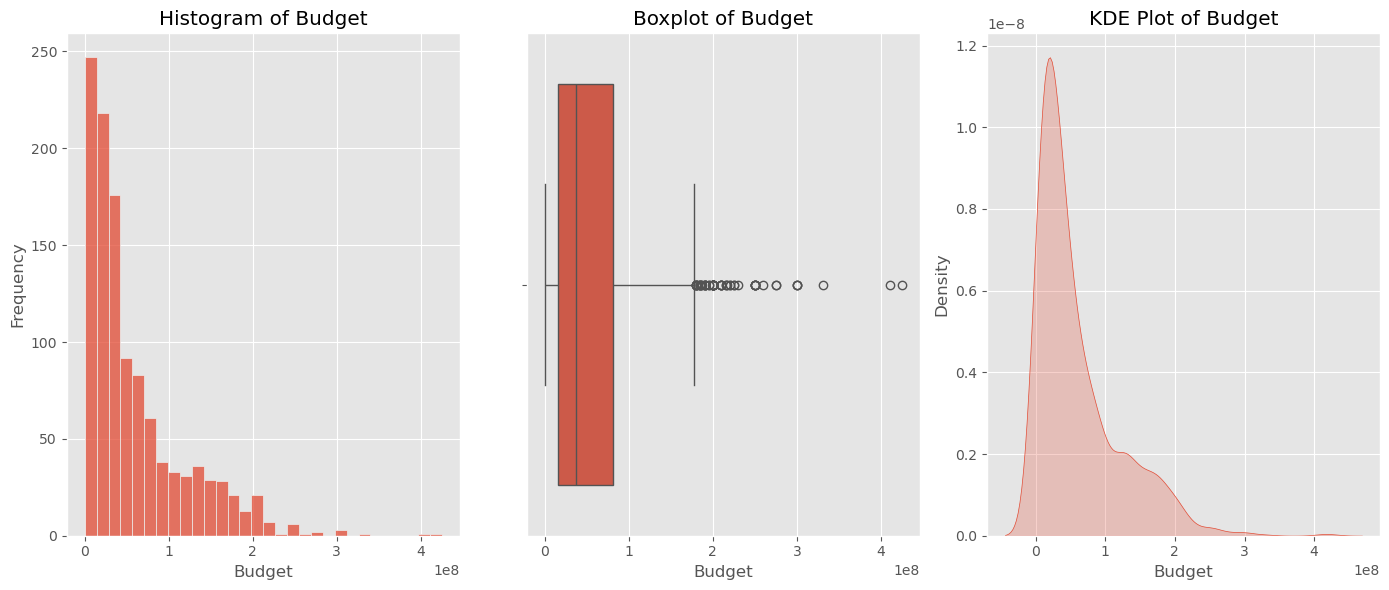

In [21]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['budget'], kde=False, bins=30)
plt.title('Histogram of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['budget'])
plt.title('Boxplot of Budget')
plt.xlabel('Budget')

plt.subplot(1, 3, 3)
sns.kdeplot(df['budget'], shade=True)
plt.title('KDE Plot of Budget')
plt.xlabel('Budget')

plt.tight_layout()
plt.show()

### Understanding `Revenue` Feature

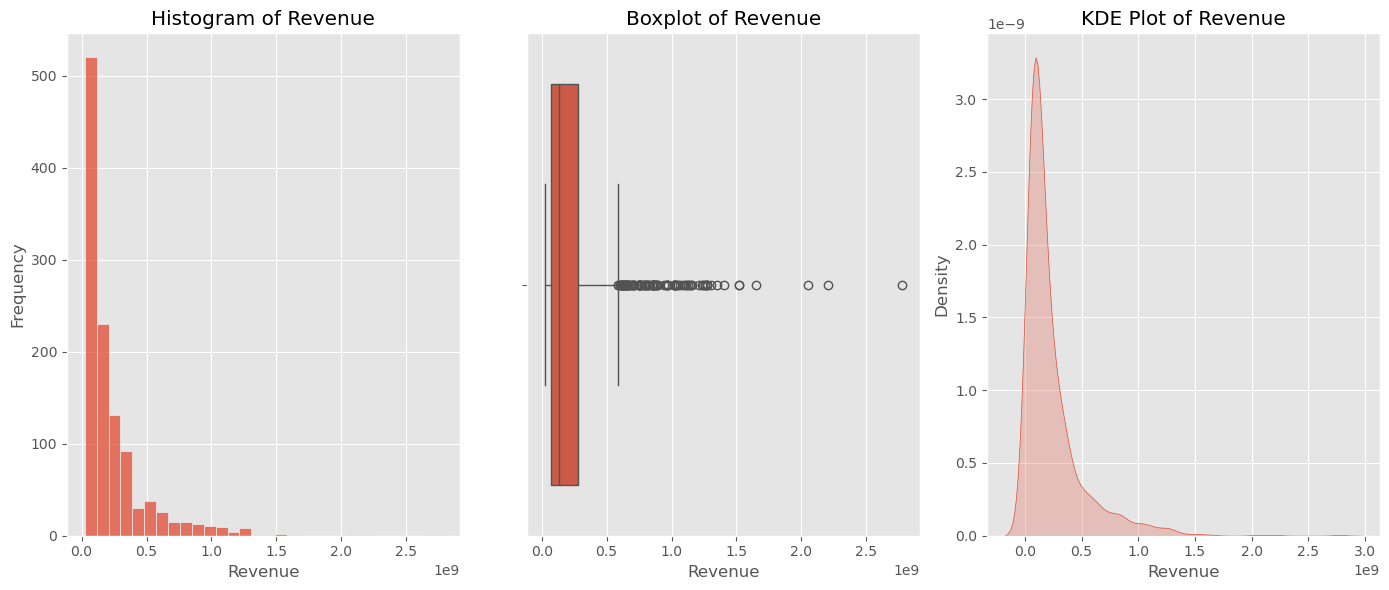

In [22]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['revenue'], kde=False, bins=30)
plt.title('Histogram of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['revenue'])
plt.title('Boxplot of Revenue')
plt.xlabel('Revenue')

plt.subplot(1, 3, 3)
sns.kdeplot(df['revenue'], shade=True)
plt.title('KDE Plot of Revenue')
plt.xlabel('Revenue')

plt.tight_layout()
plt.show()

### Understanding `Profit` Feature

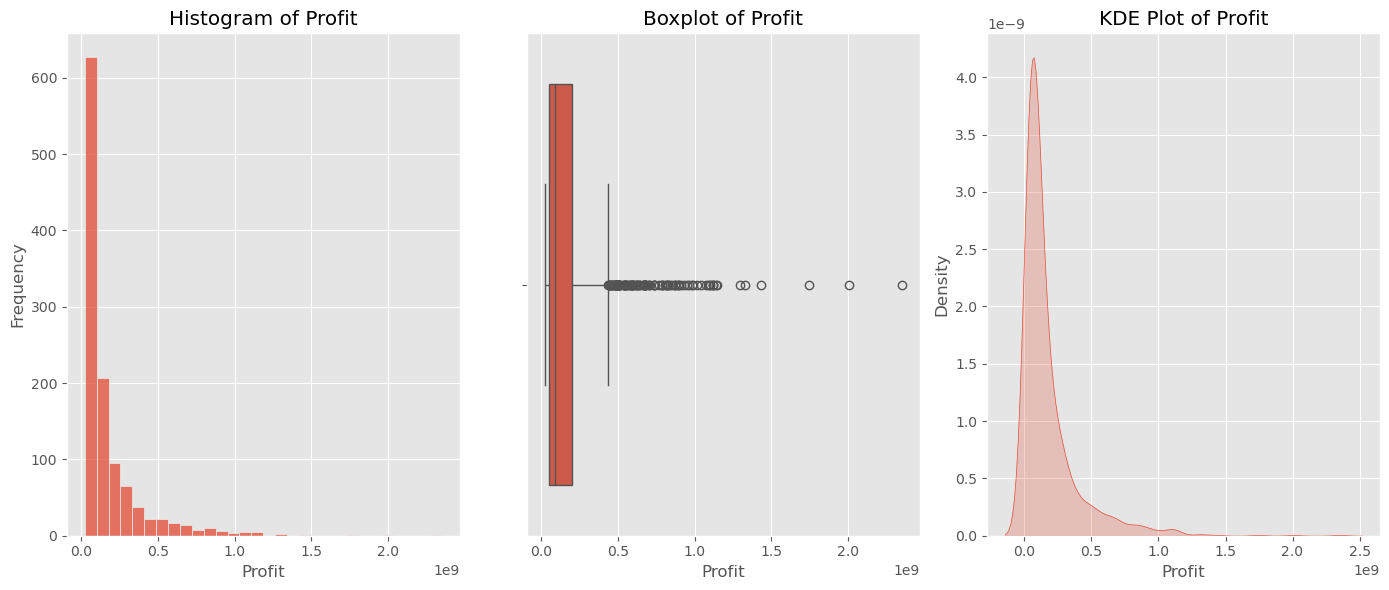

In [23]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['profit'], kde=False, bins=30)
plt.title('Histogram of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['profit'])
plt.title('Boxplot of Profit')
plt.xlabel('Profit')

plt.subplot(1, 3, 3)
sns.kdeplot(df['profit'], shade=True)
plt.title('KDE Plot of Profit')
plt.xlabel('Profit')

plt.tight_layout()
plt.show()

### Understanding `Rating` Feature

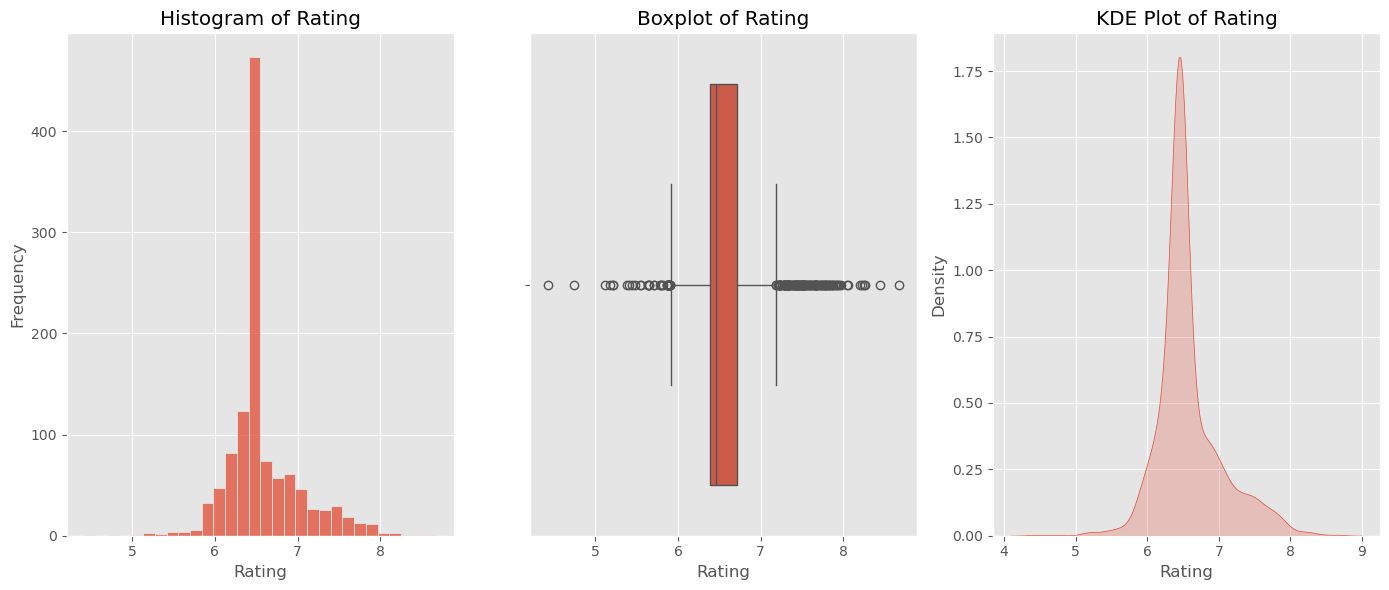

In [24]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['rating'], kde=False, bins=30)
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['rating'])
plt.title('Boxplot of Rating')
plt.xlabel('Rating')

plt.subplot(1, 3, 3)
sns.kdeplot(df['rating'], shade=True)
plt.title('KDE Plot of Rating')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

### Understanding `Genres` Feature

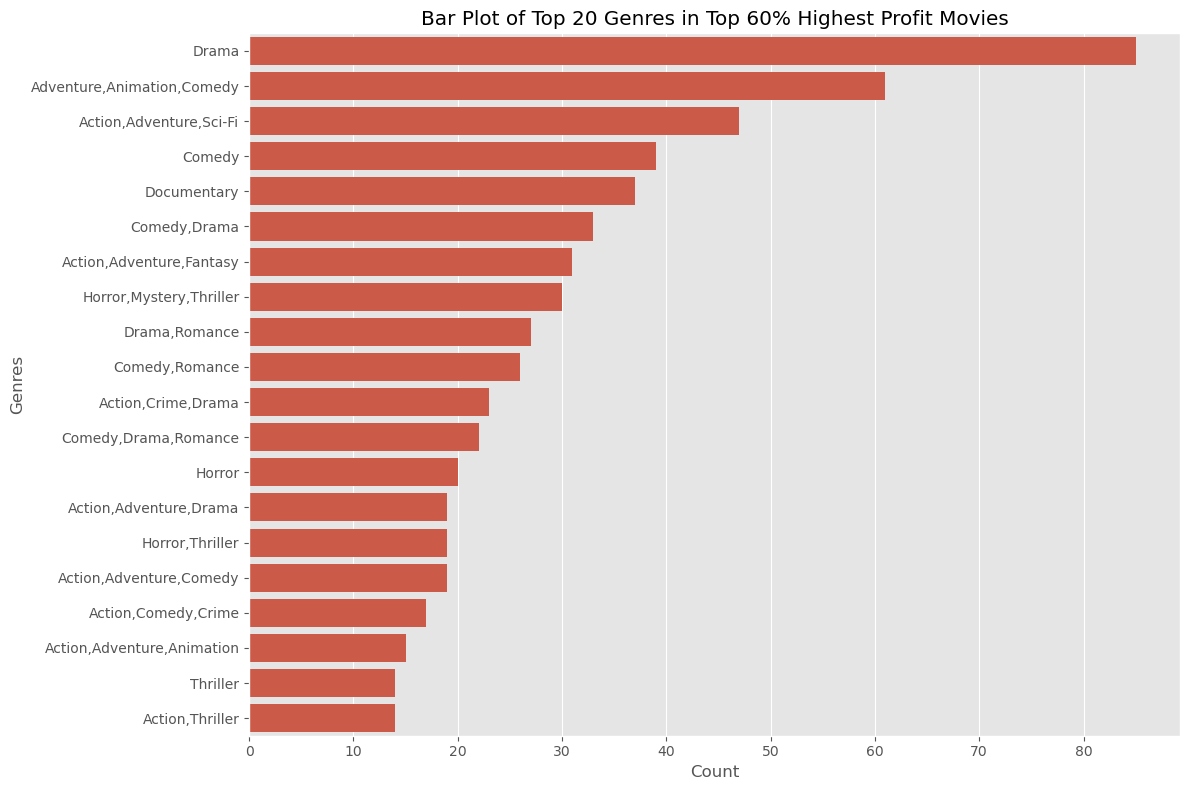

In [25]:
top_genres = df['genres'].value_counts().nlargest(20).index
mask = df[df['genres'].isin(top_genres)]

plt.figure(figsize=(12, 8))
bar_plot = sns.countplot(y=mask['genres'], order=mask['genres'].value_counts().index)
plt.title('Bar Plot of Top 20 Genres in Top 60% Highest Profit Movies')
plt.xlabel('Count')
plt.ylabel('Genres')

plt.tight_layout()
plt.show()

### Understanding `Release Date` Feature

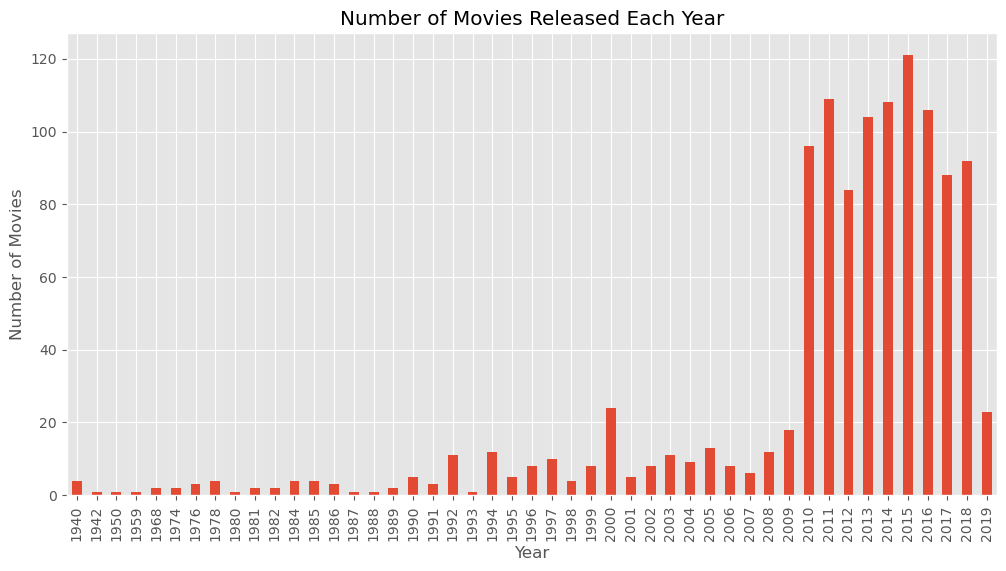

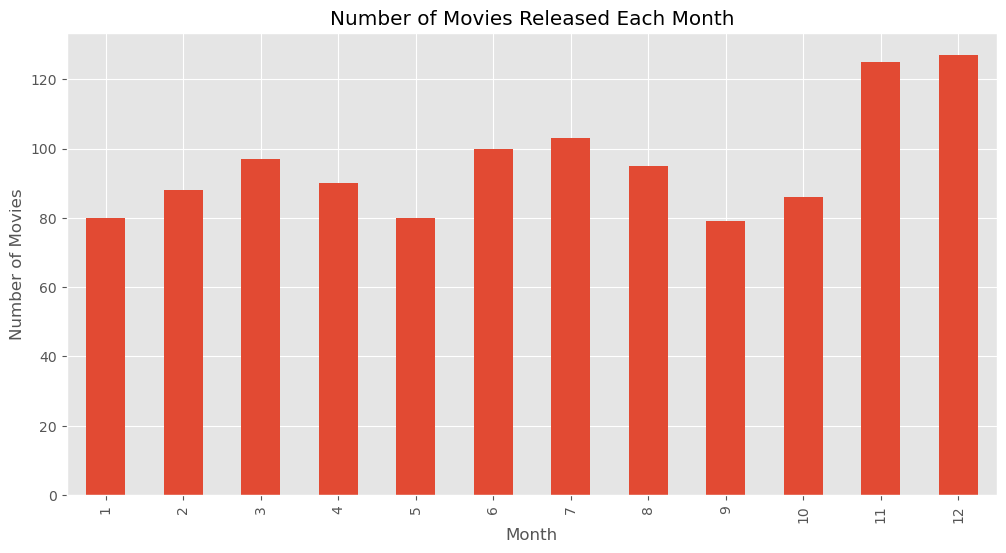

In [26]:
df['release_year'] = df['release'].dt.year
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

df['release_month'] = df['release'].dt.month
plt.figure(figsize=(12, 6))
df['release_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()